# Data Exploration

In this notebook describe your data exploration steps.

## Install dependencies

In [ ]:
%pip install pandas
%pip install seaborn
%pip install matplotlib
%pip install 'SQLAlchemy==1.4.46'

## 1. Accident data

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.io as pio
import plotly.express as px

### Load data

In [13]:
accidents = pd.read_sql_table('accidents', 'sqlite:///accidents.sqlite')

### Look at the first rows

In [14]:
accidents.head(10)

,OBJECTID,LAND,BEZ,LOR_ab_2021,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,UART,...,ULICHTVERH,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,USTRZUSTAND,XGCSWGS84,YGCSWGS84
0,219249,11,3,3701658.0,2021,11,18,2,3,0,...,2,0,1,0,1,0,0,1,13.426895,52.533940
1,219248,11,7,7501134.0,2021,12,19,7,3,6,...,2,0,1,1,0,0,0,1,13.392090,52.439951
2,219247,11,4,4100101.0,2021,12,17,4,3,5,...,2,0,1,0,0,0,0,0,13.326242,52.538028
3,219246,11,4,4501041.0,2021,12,15,7,3,5,...,1,0,1,0,1,0,0,1,13.316521,52.499534
4,219243,11,11,11501339.0,2021,12,9,5,3,3,...,0,0,1,0,0,0,1,2,13.525752,52.493867
5,219241,11,1,1100308.0,2021,12,22,5,3,1,...,2,0,1,0,0,0,0,1,13.373538,52.530962
6,219240,11,10,10200524.0,2021,12,5,1,3,1,...,2,0,1,0,0,0,0,2,13.605230,52.535845
7,219239,11,7,7200409.0,2021,12,20,7,2,5,...,2,0,1,0,0,0,0,2,13.349614,52.489439
8,219238,11,1,1300733.0,2021,11,22,3,3,2,...,2,0,1,0,0,0,0,1,13.383789,52.551246
9,219237,11,2,2200208.0,2021,12,7,2,3,6,...,2,0,1,1,0,0,0,0,13.383458,52.493785


### Data exploration
Some basic information about the data.

In [15]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11267 entries, 0 to 11266
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OBJECTID     11267 non-null  int64  
 1   LAND         11267 non-null  int64  
 2   BEZ          11267 non-null  int64  
 3   LOR_ab_2021  11266 non-null  float64
 4   UJAHR        11267 non-null  int64  
 5   UMONAT       11267 non-null  int64  
 6   USTUNDE      11267 non-null  int64  
 7   UWOCHENTAG   11267 non-null  int64  
 8   UKATEGORIE   11267 non-null  int64  
 9   UART         11267 non-null  int64  
 10  UTYP1        11267 non-null  int64  
 11  ULICHTVERH   11267 non-null  int64  
 12  IstRad       11267 non-null  int64  
 13  IstPKW       11267 non-null  int64  
 14  IstFuss      11267 non-null  int64  
 15  IstKrad      11267 non-null  int64  
 16  IstGkfz      11267 non-null  int64  
 17  IstSonstige  11267 non-null  int64  
 18  USTRZUSTAND  11267 non-null  int64  
 19  XGCS

Number of accidents per month

In [16]:
accidents.groupby(["UMONAT"]).OBJECTID.count()

UMONAT
1      481
2      436
3      765
4      720
5      991
6     1314
7     1053
8     1274
9     1300
10    1130
11    1007
12     796
Name: OBJECTID, dtype: int64

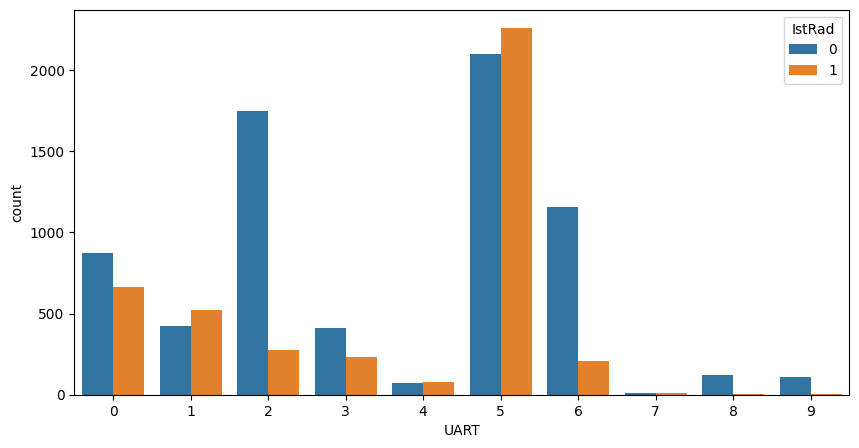

In [18]:
f,ax = plt.subplots(figsize=(10,5))
sns.countplot(x = 'UART', hue='IstRad', data = accidents)
plt.show()

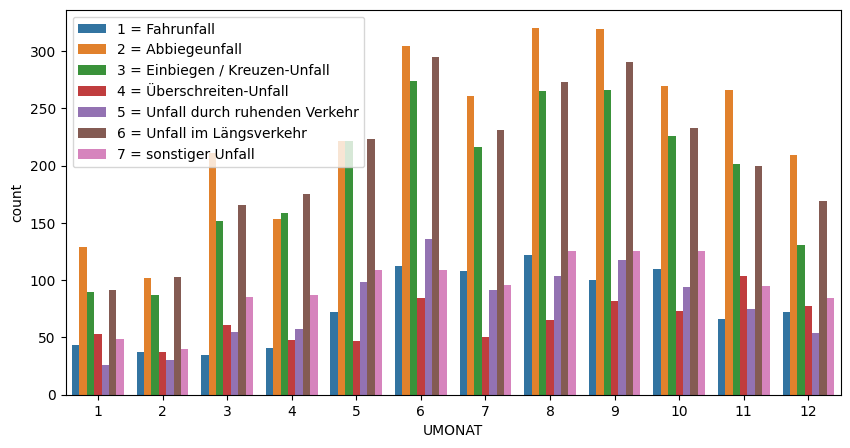

In [19]:
f,ax = plt.subplots(figsize=(10,5))
sns.countplot(x = 'UMONAT', hue='UTYP1', data = accidents)
ax.legend(["1 = Fahrunfall","2 = Abbiegeunfall","3 = Einbiegen / Kreuzen-Unfall","4 = Überschreiten-Unfall","5 = Unfall durch ruhenden Verkehr","6 = Unfall im Längsverkehr","7 = sonstiger Unfall"])
plt.show()

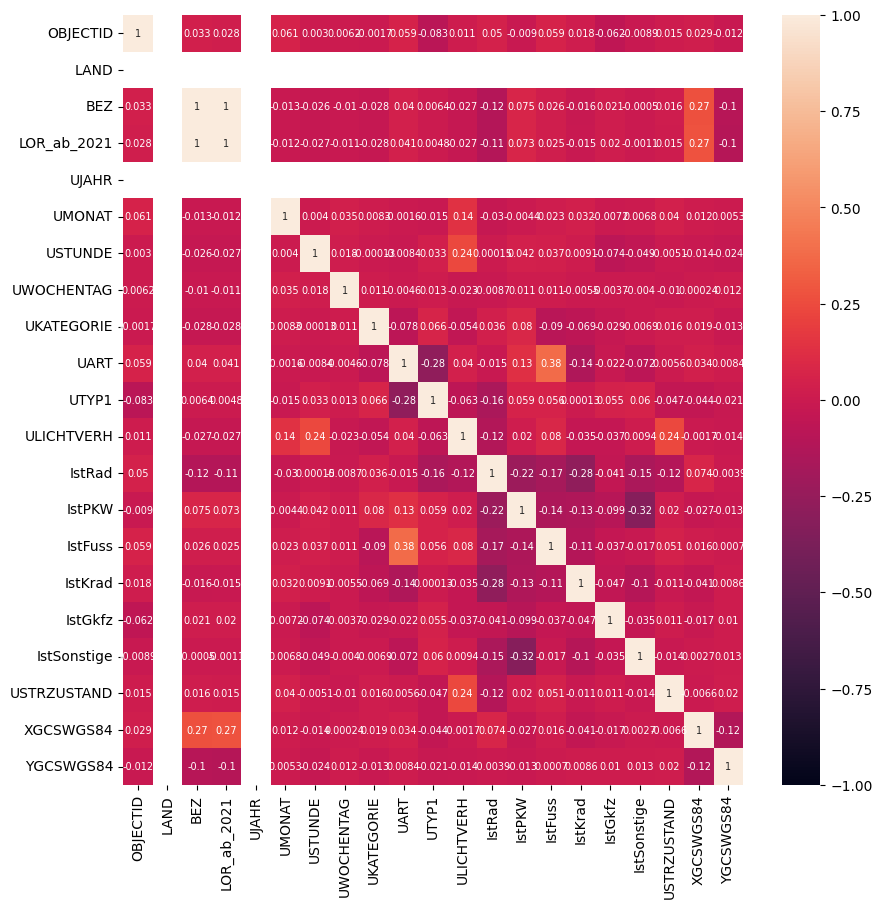

In [20]:
corr = accidents.corr()
plt.figure(figsize=(10,10))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, annot_kws={"size": 7})

Data Transformations: 

- To visualize the data it would be helpful to have the information on Fuss, Rad usw. as categorical data in one coloumn
 

In [53]:
# columns to combine

to_combine = ['IstRad','IstPKW','IstFuss','IstKrad','IstGkfz','IstSonstige']

# function to combine columns
def combine_columns(row):
    combined = []
    for column in accidents[to_combine]:
        if row[column] == 1:
            combined.append(column[3:])
    return '-'.join(combined)

# Apply the custom function to create the combined column
accidents['TMITTEL'] = accidents.apply(combine_columns, axis=1)

accidents.head()

,OBJECTID,LAND,BEZ,LOR_ab_2021,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,UART,...,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,USTRZUSTAND,XGCSWGS84,YGCSWGS84,TMITTEL
0,219249,11,3,3701658.0,2021,11,18,2,3,0,...,0,1,0,1,0,0,1,13.426895,52.533940,PKW-Krad
1,219248,11,7,7501134.0,2021,12,19,7,3,6,...,0,1,1,0,0,0,1,13.392090,52.439951,PKW-Fuss
2,219247,11,4,4100101.0,2021,12,17,4,3,5,...,0,1,0,0,0,0,0,13.326242,52.538028,PKW
3,219246,11,4,4501041.0,2021,12,15,7,3,5,...,0,1,0,1,0,0,1,13.316521,52.499534,PKW-Krad
4,219243,11,11,11501339.0,2021,12,9,5,3,3,...,0,1,0,0,0,1,2,13.525752,52.493867,PKW-Sonstige


Add this transformation to data pipeline?

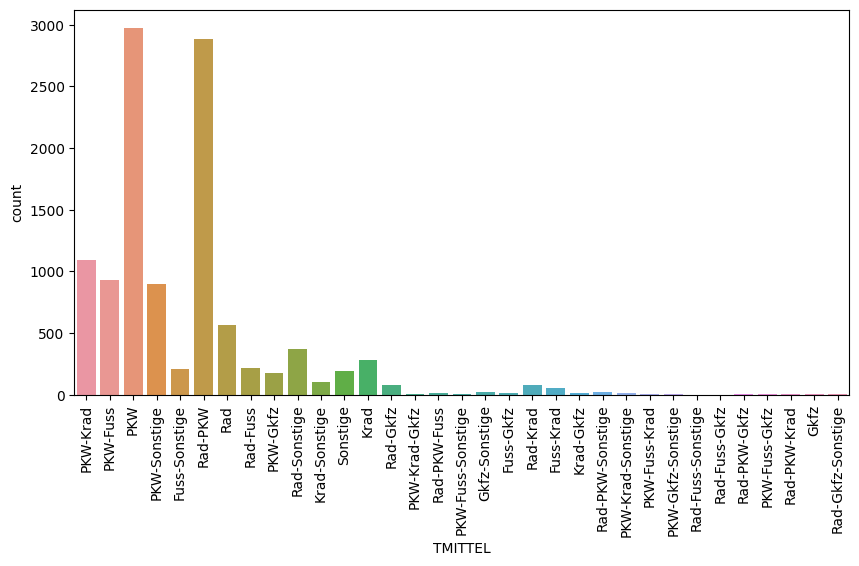

In [55]:
f,ax = plt.subplots(figsize=(10,5))
sns.countplot(x = 'TMITTEL', data = accidents)
plt.xticks(rotation='vertical')
plt.show()

# 2. Traffic data

As the traffic data is too big we are only looking at one month instead of the whole year 2021

In [19]:
traffic = pd.read_sql_table('traffic_month', 'sqlite:///traffic.sqlite')

In [6]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307512 entries, 0 to 307511
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   detid_15        307512 non-null  int64         
 1   tag             307512 non-null  datetime64[ns]
 2   stunde          307512 non-null  int64         
 3   qualitaet       307512 non-null  float64       
 4   q_kfz_det_hr    307512 non-null  int64         
 5   v_kfz_det_hr    307512 non-null  int64         
 6   q_pkw_det_hr    307512 non-null  int64         
 7   v_pkw_det_hr    307512 non-null  int64         
 8   q_lkw_det_hr    307512 non-null  int64         
 9   v_lkw_det_hr    307512 non-null  int64         
 10  MQ_KURZNAME     307512 non-null  object        
 11  DET_NAME_ALT    307512 non-null  object        
 12  DET_NAME_NEU    307512 non-null  object        
 13  DET_ID15        307512 non-null  int64         
 14  MQ_ID15         307512 non-null  int

In [7]:
traffic.describe()

,detid_15,stunde,qualitaet,q_kfz_det_hr,v_kfz_det_hr,q_pkw_det_hr,v_pkw_det_hr,q_lkw_det_hr,v_lkw_det_hr,DET_ID15,MQ_ID15,LÄNGE (WGS84),BREITE (WGS84)
count,3.075120e+05,307512.000000,307512.000000,307512.000000,307512.000000,307512.000000,307512.000000,307512.000000,307512.000000,3.075120e+05,3.075120e+05,307512.000000,307512.000000
mean,1.001010e+14,11.841037,0.960511,257.553234,41.779101,236.255210,41.812108,21.075519,38.236433,1.001010e+14,1.002010e+14,13.387737,52.506580
std,2.844282e+04,6.799871,0.071064,212.296570,13.720070,202.001405,13.972978,51.411639,18.388702,2.844282e+04,1.556690e+04,0.069731,0.037947
min,1.001010e+14,0.000000,0.750000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,1.001010e+14,1.002010e+14,13.156639,52.409598
25%,1.001010e+14,6.000000,0.920000,83.000000,35.000000,71.000000,35.000000,2.000000,31.000000,1.001010e+14,1.002010e+14,13.347179,52.494055
50%,1.001010e+14,12.000000,1.000000,213.000000,43.000000,194.000000,43.000000,8.000000,42.000000,1.001010e+14,1.002010e+14,13.384701,52.511741
75%,1.001010e+14,18.000000,1.000000,386.000000,50.000000,355.000000,50.000000,20.000000,50.000000,1.001010e+14,1.002010e+14,13.426620,52.531362
max,1.001010e+14,23.000000,1.000000,3435.000000,147.000000,3435.000000,148.000000,906.000000,111.000000,1.001010e+14,1.002010e+14,13.595328,52.581949


In [8]:
traffic.head()

,detid_15,tag,stunde,qualitaet,q_kfz_det_hr,v_kfz_det_hr,q_pkw_det_hr,v_pkw_det_hr,q_lkw_det_hr,v_lkw_det_hr,...,MQ_ID15,STRASSE,POSITION,POS_DETAIL,RICHTUNG,SPUR,annotation,LÄNGE (WGS84),BREITE (WGS84),INBETRIEBNAHME
0,100101010001076,2021-06-01,0,0.83,24,42,17,42,7,42,...,100201010000481,Berliner Straße,"zwischen Seehofstraße und Gartenstraße, in Höh...",Clayallee,West,HF_R,Hauptfahrbahn rechte Spur,13.263106,52.435112,2003-02-19
1,100101010001076,2021-06-01,2,0.75,21,41,20,40,1,61,...,100201010000481,Berliner Straße,"zwischen Seehofstraße und Gartenstraße, in Höh...",Clayallee,West,HF_R,Hauptfahrbahn rechte Spur,13.263106,52.435112,2003-02-19
2,100101010001076,2021-06-01,3,0.92,15,51,10,46,5,62,...,100201010000481,Berliner Straße,"zwischen Seehofstraße und Gartenstraße, in Höh...",Clayallee,West,HF_R,Hauptfahrbahn rechte Spur,13.263106,52.435112,2003-02-19
3,100101010001076,2021-06-01,4,0.92,56,56,46,56,10,55,...,100201010000481,Berliner Straße,"zwischen Seehofstraße und Gartenstraße, in Höh...",Clayallee,West,HF_R,Hauptfahrbahn rechte Spur,13.263106,52.435112,2003-02-19
4,100101010001076,2021-06-01,5,1.00,149,54,133,54,16,55,...,100201010000481,Berliner Straße,"zwischen Seehofstraße und Gartenstraße, in Höh...",Clayallee,West,HF_R,Hauptfahrbahn rechte Spur,13.263106,52.435112,2003-02-19


- The last three columns are not required for the analysis and contain many NULL values
- 'tag' needs to be convertated to date format
- Speed can not be smaller than 0
- seems like there is one ore more sensor with wrong coordinats (min: 0.069731, 0.037947 is not in Berlin)

Data cleaning

In [21]:
speed = ['v_kfz_det_hr', 'v_pkw_det_hr', 'v_lkw_det_hr']

for column in speed:
    traffic = traffic[traffic[column] >= 0]

traffic


,detid_15,tag,stunde,qualitaet,q_kfz_det_hr,v_kfz_det_hr,q_pkw_det_hr,v_pkw_det_hr,q_lkw_det_hr,v_lkw_det_hr,...,MQ_ID15,STRASSE,POSITION,POS_DETAIL,RICHTUNG,SPUR,annotation,LÄNGE (WGS84),BREITE (WGS84),INBETRIEBNAHME
0,100101010001076,2021-06-01,0,0.83,24,42,17,42,7,42,...,100201010000481,Berliner Straße,"zwischen Seehofstraße und Gartenstraße, in Höh...",Clayallee,West,HF_R,Hauptfahrbahn rechte Spur,13.263106,52.435112,2003-02-19
1,100101010001076,2021-06-01,2,0.75,21,41,20,40,1,61,...,100201010000481,Berliner Straße,"zwischen Seehofstraße und Gartenstraße, in Höh...",Clayallee,West,HF_R,Hauptfahrbahn rechte Spur,13.263106,52.435112,2003-02-19
2,100101010001076,2021-06-01,3,0.92,15,51,10,46,5,62,...,100201010000481,Berliner Straße,"zwischen Seehofstraße und Gartenstraße, in Höh...",Clayallee,West,HF_R,Hauptfahrbahn rechte Spur,13.263106,52.435112,2003-02-19
3,100101010001076,2021-06-01,4,0.92,56,56,46,56,10,55,...,100201010000481,Berliner Straße,"zwischen Seehofstraße und Gartenstraße, in Höh...",Clayallee,West,HF_R,Hauptfahrbahn rechte Spur,13.263106,52.435112,2003-02-19
4,100101010001076,2021-06-01,5,1.00,149,54,133,54,16,55,...,100201010000481,Berliner Straße,"zwischen Seehofstraße und Gartenstraße, in Höh...",Clayallee,West,HF_R,Hauptfahrbahn rechte Spur,13.263106,52.435112,2003-02-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,100101010093329,2021-06-30,16,1.00,323,24,317,24,6,26,...,100201010052924,Invalidenstraße,Höhe Nordbahnhof,Ost,Ost,HF_R,Hauptfahrbahn rechte Spur,13.387089,52.531362,2016-09-04
307505,100101010093329,2021-06-30,17,1.00,313,25,309,25,4,26,...,100201010052924,Invalidenstraße,Höhe Nordbahnhof,Ost,Ost,HF_R,Hauptfahrbahn rechte Spur,13.387089,52.531362,2016-09-04
307506,100101010093329,2021-06-30,18,1.00,309,25,307,25,2,29,...,100201010052924,Invalidenstraße,Höhe Nordbahnhof,Ost,Ost,HF_R,Hauptfahrbahn rechte Spur,13.387089,52.531362,2016-09-04
307507,100101010093329,2021-06-30,19,1.00,288,24,286,24,2,20,...,100201010052924,Invalidenstraße,Höhe Nordbahnhof,Ost,Ost,HF_R,Hauptfahrbahn rechte Spur,13.387089,52.531362,2016-09-04


In [22]:
traffic.describe()

,detid_15,stunde,qualitaet,q_kfz_det_hr,v_kfz_det_hr,q_pkw_det_hr,v_pkw_det_hr,q_lkw_det_hr,v_lkw_det_hr,DET_ID15,MQ_ID15,LÄNGE (WGS84),BREITE (WGS84)
count,2.719460e+05,271946.000000,271946.000000,271946.000000,271946.000000,271946.000000,271946.000000,271946.000000,271946.000000,2.719460e+05,2.719460e+05,271946.000000,271946.000000
mean,1.001010e+14,11.878994,0.963729,275.144069,43.124168,251.122513,43.224769,23.777875,43.302512,1.001010e+14,1.002010e+14,13.389647,52.505714
std,2.852917e+04,6.584040,0.068163,203.713453,12.383388,193.470660,12.688719,54.046427,12.446751,2.852917e+04,1.557288e+04,0.070278,0.038936
min,1.001010e+14,0.000000,0.750000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.001010e+14,1.002010e+14,13.156639,52.409598
25%,1.001010e+14,7.000000,0.920000,102.000000,36.000000,86.000000,36.000000,4.000000,35.000000,1.001010e+14,1.002010e+14,13.350817,52.491694
50%,1.001010e+14,12.000000,1.000000,240.000000,44.000000,217.000000,44.000000,10.000000,44.000000,1.001010e+14,1.002010e+14,13.385874,52.511443
75%,1.001010e+14,17.000000,1.000000,407.000000,51.000000,375.000000,51.000000,23.000000,51.000000,1.001010e+14,1.002010e+14,13.428431,52.531316
max,1.001010e+14,23.000000,1.000000,3269.000000,147.000000,3266.000000,148.000000,906.000000,111.000000,1.001010e+14,1.002010e+14,13.595328,52.581949


An secon option to reduce the big dataset could be to build daily averages instead of looking at hourly traffic data:

In [40]:
tarffic_daily_avg = traffic.groupby(["detid_15","tag"])[["qualitaet","q_kfz_det_hr","v_kfz_det_hr","q_pkw_det_hr","v_pkw_det_hr","q_lkw_det_hr","v_lkw_det_hr", "LÄNGE (WGS84)", "BREITE (WGS84)"]].mean()
tarffic_daily_avg.head()

qualitaet  q_kfz_det_hr  v_kfz_det_hr  \
detid_15        tag                                                 
100101010001076 2021-06-01   0.946522    348.869565     45.173913   
                2021-06-02   0.960870    383.478261     48.913043   
                2021-06-03   0.972000    399.750000     45.200000   
                2021-06-04   0.960870    375.173913     50.739130   
                2021-06-05   0.960000    319.260870     47.217391   

                            q_pkw_det_hr  v_pkw_det_hr  q_lkw_det_hr  \
detid_15        tag                                                    
100101010001076 2021-06-01    103.173913     45.956522    245.695652   
                2021-06-02    167.478261     51.260870    216.000000   
                2021-06-03    116.500000     47.050000    283.250000   
                2021-06-04     89.043478     55.260870    286.173913   
                2021-06-05     84.565217     50.521739    234.782609   

                            v_lkw_det_hr  LÄNGE (WGS84)  BREITE (WGS84)  
detid_15        tag                                                      
100101010001076 2021-06-01     46.304348      13.263106       52.435112  
                2021-06-02     48.652174      13.263106       52.435112  
                2021-06-03     44.750000      13.263106       52.435112  
                2021-06-04     49.913043      13.263106       52.435112  
                2021-06-05     47.043478      13.263106       52.435112

This is included in the data pipline to get traffic data for the whole year on daily granularity

In [43]:
traffic_avg = pd.read_sql_table('traffic_2021', 'sqlite:///traffic.sqlite')
traffic_avg.head()

,detid_15,tag,qualitaet,q_kfz_det_hr,v_kfz_det_hr,q_pkw_det_hr,v_pkw_det_hr,q_lkw_det_hr,v_lkw_det_hr,MQ_KURZNAME,...,MQ_ID15,STRASSE,POSITION,POS_DETAIL,RICHTUNG,SPUR,annotation,LÄNGE (WGS84),BREITE (WGS84),INBETRIEBNAHME
0,100101010000167,01.01.2021,1.0,262.958333,76.279167,259.833333,76.483333,3.125000,56.312500,TE001,...,100201010000077,A115,AS Spanische Allee – Brücke,AK Zehlendorf,Südwest,HF_R,Hauptfahrbahn rechte Spur,13.192578,52.433868,2003-02-18
1,100101010000167,02.01.2021,1.0,425.458333,76.316667,415.958333,76.995833,9.500000,67.666667,TE001,...,100201010000077,A115,AS Spanische Allee – Brücke,AK Zehlendorf,Südwest,HF_R,Hauptfahrbahn rechte Spur,13.192578,52.433868,2003-02-18
2,100101010000167,03.01.2021,1.0,345.708333,71.070833,337.791667,72.037500,7.916667,61.408333,TE001,...,100201010000077,A115,AS Spanische Allee – Brücke,AK Zehlendorf,Südwest,HF_R,Hauptfahrbahn rechte Spur,13.192578,52.433868,2003-02-18
3,100101010000167,04.01.2021,1.0,546.000000,78.025000,481.291667,79.308333,64.708333,72.920833,TE001,...,100201010000077,A115,AS Spanische Allee – Brücke,AK Zehlendorf,Südwest,HF_R,Hauptfahrbahn rechte Spur,13.192578,52.433868,2003-02-18
4,100101010000167,05.01.2021,1.0,568.958333,76.570833,508.333333,78.466667,60.625000,68.250000,TE001,...,100201010000077,A115,AS Spanische Allee – Brücke,AK Zehlendorf,Südwest,HF_R,Hauptfahrbahn rechte Spur,13.192578,52.433868,2003-02-18


During which hours is the most traffic?

In [44]:
traffic_hours = traffic.groupby("stunde")[["q_kfz_det_hr","v_kfz_det_hr","q_pkw_det_hr","v_pkw_det_hr","q_lkw_det_hr","v_lkw_det_hr"]].mean()
traffic_hours

,q_kfz_det_hr,v_kfz_det_hr,q_pkw_det_hr,v_pkw_det_hr,q_lkw_det_hr,v_lkw_det_hr
stunde,,,,,,
0,95.453218,43.755416,88.931873,43.861740,6.379072,36.176456
1,68.684853,43.719118,63.753822,43.715252,4.847391,34.253470
2,54.588606,43.403115,49.986103,43.355017,4.535482,34.703331
3,50.276996,43.925682,45.009942,43.981297,5.197756,37.479181
4,68.308124,45.571747,60.002943,45.663783,8.183180,41.171230
5,150.983100,46.306207,135.311894,46.418662,15.513416,42.867441
6,241.911665,44.540782,215.142428,44.580332,26.571868,42.313096
7,293.763325,42.369923,262.606598,42.379964,30.897177,40.810131
8,330.431636,40.960230,298.260522,40.984899,31.896464,39.195036


Overall avarage for each sensor

In [34]:
traffic_sensors = traffic.groupby('detid_15')[["q_kfz_det_hr","v_kfz_det_hr","q_pkw_det_hr","v_pkw_det_hr","q_lkw_det_hr","v_lkw_det_hr","LÄNGE (WGS84)","BREITE (WGS84)"]].mean()
traffic_sensors.describe()

,q_kfz_det_hr,v_kfz_det_hr,q_pkw_det_hr,v_pkw_det_hr,q_lkw_det_hr,v_lkw_det_hr,LÄNGE (WGS84),BREITE (WGS84)
count,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000
mean,251.942477,41.325460,230.521475,41.263227,21.310465,37.659619,13.388527,52.505290
std,142.467421,12.681802,139.578235,12.624035,36.574929,13.979194,0.073788,0.038401
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,13.156639,52.409598
25%,166.369751,35.109366,148.051642,35.352351,6.693806,30.632901,13.345970,52.491688
50%,249.344083,42.671788,225.163919,42.606522,12.881056,39.367623,13.385779,52.510579
75%,321.230234,49.494510,300.298075,49.486021,20.888831,46.144426,13.430271,52.530905
max,1773.213592,92.564356,1769.398058,97.694484,319.234399,92.209335,13.595328,52.581949


# To report

Find locations with high traffic (above 75% quartil)

In [58]:
df2_high_traffic = traffic_sensors[(df2_sensors["q_kfz_det_hr"] > 321.230234)]
df2_high_traffic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117 entries, 100101010001076 to 100101010084134
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   q_kfz_det_hr  117 non-null    float64
 1   v_kfz_det_hr  117 non-null    float64
 2   q_pkw_det_hr  117 non-null    float64
 3   v_pkw_det_hr  117 non-null    float64
 4   q_lkw_det_hr  117 non-null    float64
 5   v_lkw_det_hr  117 non-null    float64
dtypes: float64(6)
memory usage: 6.4 KB


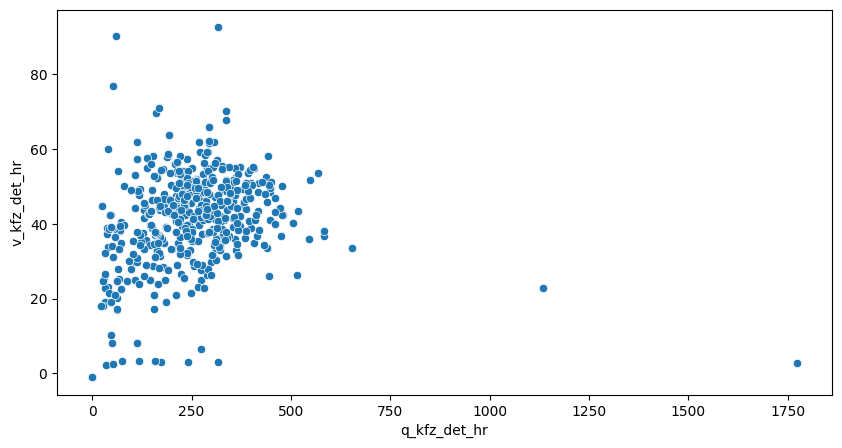

In [61]:
f,ax = plt.subplots(figsize=(10,5))
sns.scatterplot(x = 'q_kfz_det_hr', y ='v_kfz_det_hr', data = df2_sensors)
plt.show()